# Test unilatéral à droite
Les charges de rupture de câbles produits par une fabrique ont une valeur moyenne de 1800 kg et un écart-type de 100 kg. 

On affirme que la charge de rupture peut être augmentée par une technique nouvelle du procédé de fabrication. 

Pour tester cette affirmation, on a testé un échantillon de 50 câbles produits par la technique nouvelle et l’on a trouvé une charge de rupture moyenne de 1850 kg. 

Peut-on admettre l'affirmation précédente avec un seuil de signification de 0.01 ?

- h0 : p <= 1800
- h1 : ben non

Moyenne observée = 1850
Sigma moyenne = 14.14213562373095
Valeur observée Z = 3.5355339059327378
Seuil critique = 2.3263478740408408
On rejette H0 : la charge a augmentée


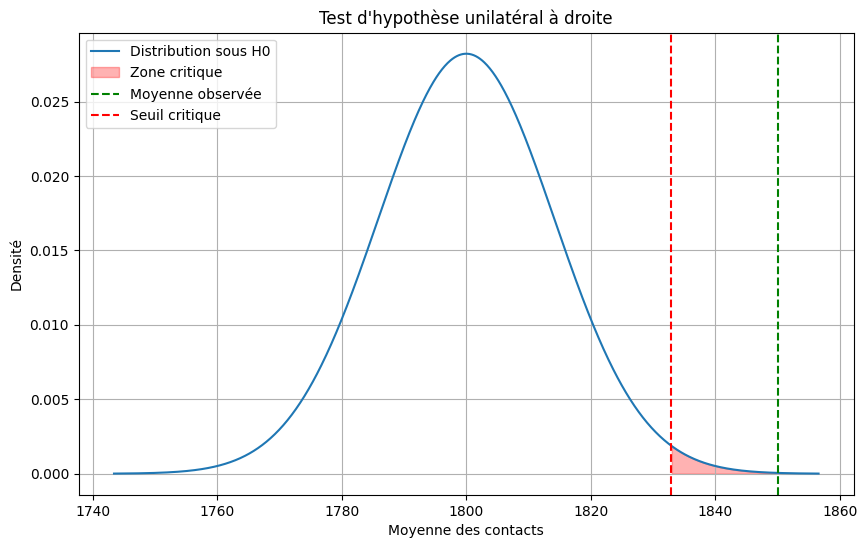

In [4]:
import math
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

mu = 1800
sigma = 100

n = 50
moyenne_observee = 1850
alpha = 0.01

sigma_moyenne = sigma / math.sqrt(n)

Z = (moyenne_observee - mu) / sigma_moyenne

Z_crit = norm.ppf(1 - alpha)

print("Moyenne observée =", moyenne_observee)
print("Sigma moyenne =", sigma_moyenne)
print("Valeur observée Z =", Z)
print("Seuil critique =", Z_crit)

# Test unilatéral à droite
if Z >= Z_crit:
    print("On rejette H0 : la charge a augmentée")
else:
    print("On ne rejette pas H0 : La charge n'a pas augmenté")


# --- Graphique ---
x = np.linspace(mu - 4*sigma_moyenne, mu + 4*sigma_moyenne, 1000)
y = norm.pdf(x, mu, sigma_moyenne)

plt.figure(figsize=(10,6))
plt.plot(x, y, label="Distribution sous H0")
plt.fill_between(x, 0, y, where=(x >= mu + Z_crit*sigma_moyenne), color='red', alpha=0.3, label="Zone critique")
plt.axvline(moyenne_observee, color='green', linestyle='--', label="Moyenne observée")
plt.axvline(mu + Z_crit*sigma_moyenne, color='red', linestyle='--', label="Seuil critique")
plt.title("Test d'hypothèse unilatéral à droite")
plt.xlabel("Moyenne des contacts")
plt.ylabel("Densité")
plt.legend()
plt.grid(True)
plt.show()